# Load combined data (ADNI and IDP together)

In [25]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
import os 
import scipy.io
from scipy import stats
from __future__ import print_function
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import pandas as pd

## Load Matrices
def data_fetch_clean():
    test=scipy.io.loadmat('adni_connectome_aparc_length.mat')
    aparcl_adni=np.array(test['connectome_aparc0x2Baseg_length'])

    test=scipy.io.loadmat('adni_connectome_aparc_count.mat')
    aparcc_adni=np.array(test['connectome_aparc0x2Baseg_count'])

    test=scipy.io.loadmat('adni_connectome_aparc2009_length.mat')
    aparc2l_adni=np.array(test['connectome_aparc0x2Ea2009s0x2Baseg_length'])

    test=scipy.io.loadmat('adni_connectome_aparc2009_count.mat')
    aparc2c_adni=np.array(test['connectome_aparc0x2Ea2009s0x2Baseg_count'])

    test=scipy.io.loadmat('idp_connectome_aparc_length.mat')
    aparcl_idp=np.array(test['connectome_aparc_length'])

    test=scipy.io.loadmat('idp_connectome_aparc_count.mat')
    aparcc_idp=np.array(test['connectome_aparc_count'])

    test=scipy.io.loadmat('idp_connectome_aparc2009_length.mat')
    aparc2l_idp=np.array(test['connectome_aparc2009_length'])

    test=scipy.io.loadmat('idp_connectome_aparc2009_count.mat')
    aparc2c_idp=np.array(test['connectome_aparc2009_count'])



    ## Zeropad smaller matrices, organized into X

    zeromatal=np.zeros([164,164,179])
    zeromatac=np.zeros([164,164,179])

    zeromatal[40:124,40:124,:]=aparcl_adni
    zeromatac[40:124,40:124,:]=aparcc_adni

    aparcl_adni=zeromatal
    aparcc_adni=zeromatac

    X1=np.zeros([164,164,179,4])
    X1[:,:,:,0]=aparcl_adni
    X1[:,:,:,1]=aparcc_adni
    X1[:,:,:,2]=aparc2l_adni
    X1[:,:,:,3]=aparc2c_adni

    X1=X1.transpose([2,0,1,3])
    print(X1.shape)



    zeromatal=np.zeros([164,164,211])
    zeromatac=np.zeros([164,164,211])

    zeromatal[40:124,40:124,:]=aparcl_idp
    zeromatac[40:124,40:124,:]=aparcc_idp

    aparcl_idp=zeromatal
    aparcc_idp=zeromatac

    X2=np.zeros([164,164,211,4])
    X2[:,:,:,0]=aparcl_idp
    X2[:,:,:,1]=aparcc_idp
    X2[:,:,:,2]=aparc2l_idp
    X2[:,:,:,3]=aparc2c_idp

    X2=X2.transpose([2,0,1,3])
    print(X2.shape)




    datasubjid=pd.read_csv('idp_data_1_mor.csv',header=0)
    datasubjid=np.array(datasubjid)
    datasubjid=datasubjid[:,0]
    print(datasubjid.shape)
    matsubjid=pd.read_csv('idp_connectome_subjectlist.csv',header=0)
    matsubjid=np.array(matsubjid)
    print(matsubjid.shape)

    filtindex=np.isin(matsubjid,datasubjid)
    filtindex=filtindex.ravel()

    X2=X2[filtindex,:,:,:]
    print(X2.shape)

    data=pd.read_csv('idp_data_1_mor.csv',header=0)
    data=np.array(data)

    ad_smi=data[:,5]
    mci_smi=data[:,6]
    ad_mci=data[:,7]

    ind_num=np.isnan(ad_smi)
    y2_adsmi=ad_smi[~ind_num]
    X2_adsmi=X2[~ind_num,:,:,:]
    print(y2_adsmi.shape)
    print(X2_adsmi.shape)

    ind_num=np.isnan(mci_smi)
    y2_mcismi=mci_smi[~ind_num]
    X2_mcismi=X2[~ind_num,:,:,:]
    print(y2_mcismi.shape)
    print(X2_mcismi.shape)

    ind_num=np.isnan(ad_mci)
    y2_admci=ad_mci[~ind_num]
    X2_admci=X2[~ind_num,:,:,:]
    print(y2_admci.shape)
    print(X2_admci.shape)



    ## Less matrix than subjects, grabbing respective labels into y

    data=pd.read_csv('adni_data_1_mor.csv',header=0)
    data=np.array(data)
    datasubjid=data[:,0]
    print(datasubjid.shape)
    matsubjid=pd.read_csv('adni_connectome_subjectlist.csv',header=0)
    matsubjid=np.array(matsubjid)
    print(matsubjid.shape)

    filtindex=np.isin(datasubjid,matsubjid)
    filtindex=filtindex.ravel()
    labels=data[:,13]
    y1=labels[filtindex]
    print(y1.shape)


    ## Get index for X and y for experiment

    # smi=1 , mci=2, ad=3

    smiloc=np.asarray(np.where(y1==1))
    smiloc=np.ndarray.transpose(smiloc)
    mciloc=np.asarray(np.where(y1==2))
    mciloc=np.ndarray.transpose(mciloc)
    adloc=np.asarray(np.where(y1==3))
    adloc=np.ndarray.transpose(adloc)

    #1v3, smi=0, ad=1
    totalsize=len(smiloc)+len(adloc)
    y1_adsmi=np.zeros([totalsize])
    X1_adsmi=np.zeros([totalsize,164,164,4])
    for i in range(len(smiloc)):
        y1_adsmi[i]=0
        X1_adsmi[i,:,:,:]=X1[smiloc[i],:,:,:]
    for j in range(len(adloc)):
        y1_adsmi[len(smiloc)+j]=1
        X1_adsmi[len(smiloc)+j,:,:,:]=X1[adloc[j],:,:,:]
    print(y1_adsmi.shape)
    print(X1_adsmi.shape)

    #1v2, smi=0, mci=1
    totalsize=len(smiloc)+len(mciloc)
    y1_mcismi=np.zeros([totalsize])
    X1_mcismi=np.zeros([totalsize,164,164,4])
    for i in range(len(smiloc)):
        y1_mcismi[i]=0
        X1_mcismi[i,:,:,:]=X1[smiloc[i],:,:,:]
    for j in range(len(mciloc)):
        y1_mcismi[len(smiloc)+j]=1
        X1_mcismi[len(smiloc)+j,:,:,:]=X1[mciloc[j],:,:,:]
    print(y1_mcismi.shape)
    print(X1_mcismi.shape)

    #2v3, mci=0, ad=1
    totalsize=len(mciloc)+len(adloc)
    y1_admci=np.zeros([totalsize])
    X1_admci=np.zeros([totalsize,164,164,4])
    for i in range(len(mciloc)):
        y1_admci[i]=0
        X1_admci[i,:,:,:]=X1[smiloc[i],:,:,:]
    for j in range(len(adloc)):
        y1_admci[len(mciloc)+j]=1
        X1_admci[len(mciloc)+j,:,:,:]=X1[adloc[j],:,:,:]
    print(y1_admci.shape)
    print(X1_admci.shape)




    # Combine all the datasets into one
    # adni first then idp

    X_adsmi=np.concatenate((X1_adsmi,X2_adsmi),axis=0)
    X_adsmi_new=X_adsmi.reshape(X_adsmi.shape[0],X_adsmi.shape[1]*X_adsmi.shape[2]*X_adsmi.shape[3])
    y_adsmi=np.concatenate((y1_adsmi,y2_adsmi),axis=0)
    print(X_adsmi_new.shape)
    print(y_adsmi.shape)

    X_mcismi=np.concatenate((X1_mcismi,X2_mcismi),axis=0)
    X_mcismi_new=X_mcismi.reshape(X_mcismi.shape[0],X_mcismi.shape[1]*X_mcismi.shape[2]*X_mcismi.shape[3])
    y_mcismi=np.concatenate((y1_mcismi,y2_mcismi),axis=0)
    print(X_mcismi_new.shape)
    print(y_mcismi.shape)

    X_admci=np.concatenate((X1_admci,X2_admci),axis=0)
    X_admci_new=X_admci.reshape(X_admci.shape[0],X_admci.shape[1]*X_admci.shape[2]*X_admci.shape[3])

    y_admci=np.concatenate((y1_admci,y2_admci),axis=0)
    print(X_admci_new.shape)
    print(y_admci.shape)
    return X_adsmi_new,y_adsmi,X_mcismi_new,y_mcismi,X_admci_new,y_admci


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## SVM and Logistic regression Model Parameter Tuning..

In [26]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

def lr_param_selection(X, y, nfolds):
    Cs = [1000,10000,10e5,10e6]
    # gammas = [0.001, 0.01, 0.1, 1] 
    param_grid = {'C': Cs}
    grid_search = GridSearchCV(linear_model.LogisticRegression(), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [27]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
import numpy as np
import pandas as pd
from pprint import pprint
from os import listdir
from os.path import isfile, join
from sklearn.model_selection import StratifiedKFold
from scipy import stats
import numpy as np
from sklearn import linear_model, svm
import re
from sklearn.metrics import roc_curve, auc,f1_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
#s = "../braindata/data_1_mor_select_100.csv"
import os          
from sklearn import linear_model, svm
from sklearn.ensemble import ExtraTreesClassifier
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
from sklearn import svm, grid_search
from sklearn.model_selection import GridSearchCV


def main(X,y,svm_para,lr_para,cv,re,name,n_features,path_to_save):
    logistic = linear_model.LogisticRegression(C=lr_para["C"])
    rbf = svm.SVC(C=svm_para["C"],kernel='linear',gamma=svm_para["gamma"])

    skf=RepeatedStratifiedKFold(n_splits=cv, n_repeats=re)
    lr_all_accs = []
    lr_all_scores = []
    lr_f1s = []
    svm_all_accs = []
    svm_all_scores = []
    svm_f1s = []

    lr_accuracies = []
    lr_scores = []
    svm_accuracies = []
    svm_scores = []
    strat_labels = []


    for train_index, test_index in skf.split(X, y):

            train_data, test_data = X[train_index], X[test_index]
            train_labels, test_labels = y[train_index], y[test_index]
            strat_labels = np.append(strat_labels, test_labels)

            clf = ExtraTreesClassifier(n_estimators=10000, random_state=0)
            clf = clf.fit(train_data, train_labels)
            importances = clf.feature_importances_
            importances
            indices = np.argsort(importances)[::-1]
            #print("Feature ranking:")
            #print(train_labels.shape)
            #for f in range(X.shape[1]):
            #    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
            #n_features = [10,30,50,70,80,100,1000,2000,13000,18000,10000,20000,3000,30000,4000,500,5000,6000,7000,8000,9000,15000,25000]
            #n_features = [1000]
            n_features.sort()



            for i in n_features:


                index=indices[0:i]
                #print(index.shape)
                features=train_data[:,index]

                feature_num=features.shape[1]
                #print(feature_num)


                #train_data, test_data = features[train_index], features[test_index]
                #train_labels, test_labels = y[train_index], y[test_index]


                log = logistic.fit(train_data[:,index], train_labels)
                #print(train_data[:,index].shape)
                log_prob = log.decision_function(test_data[:,index])
                log_acc = log.score(test_data[:,index], test_labels)

                #f1 calculation
                y_pred = logistic.predict(test_data[:,index])
                log_f1 = f1_score(test_labels, y_pred)

                lr_accuracies = np.append(lr_accuracies, log_acc)
                lr_scores = np.append(lr_scores, log_prob)
                lr_f1s = np.append(lr_f1s, log_f1)
                #print('Logistic Regression Accuracy: %f' % log_acc)

                rbf = rbf.fit(train_data[:,index], train_labels)
                svm_acc = rbf.score(test_data[:,index], test_labels)
                svm_prob = rbf.decision_function(test_data[:,index])

                #f1 calculation
                y_pred = rbf.predict(test_data[:,index])
                svm_f1 = f1_score(test_labels, y_pred)
                #print('SVM Accuracy: %f' % svm_acc)
                svm_accuracies = np.append(svm_accuracies, svm_acc)
                svm_scores = np.append(svm_scores, svm_prob)
                svm_f1s = np.append(svm_f1s, svm_f1)
                #print('SVM f1: %f' % svm_f1)


                lr_all_scores = np.append(lr_all_scores, lr_scores)
                lr_fold_avg = np.mean(lr_accuracies)
                lr_all_accs = np.append(lr_all_accs, lr_fold_avg)
                svm_all_scores = np.append(svm_all_scores, svm_scores)
                svm_fold_avg = np.mean(svm_accuracies)
                svm_all_accs = np.append(svm_all_accs, svm_fold_avg)
                #print('Logistic Regression Accuracy: %f' % log_acc_avg)
                #print('SVM Regression Accuracy: %f' % svm_acc_avg)
                #feature_num_all=np.append(feature_num_all,feature_num)
                #print(feature_num_all)
                # print(np.mean(lr_all_accs))
                #print(np.mean(svm_all_accs))      
                #lr_all_feature=np.append(lr_all_feature,np.mean(lr_all_accs))
                ##svm_all_feature=np.append(svm_all_feature,np.mean(svm_all_accs))
                #lr_fls_feature=np.append(lr_fls_feature,np.mean(lr_f1s))
                #svm_fls_feature=np.append(svm_fls_feature,np.mean(svm_f1s))
                #base_labels_all = np.append(base_labels_all,strat)
                #base_labels = np.append(base_labels, np.mean(strat_labels))



    lracc=lr_all_accs.reshape(len(n_features),int(lr_all_accs.shape[0]/len(n_features)))
    lrcc=np.mean(lracc,axis=1)
    #print(np.max(lracc))
    svmacc=svm_all_accs.reshape(len(n_features),int(lr_all_accs.shape[0]/len(n_features)))
    svmcc=np.mean(svmacc,axis=1)
    #np.max(svmcc)
   # return lrcc, svmcc,n_features

    import matplotlib.pyplot as plt

    plt.figure()
    plt.plot( (n_features), lrcc*100, lw=5,label='Logistic Regression')
    plt.plot( (n_features), svmcc*100, lw=5,label='SVM')
    plt.xlim([0, 30000])
    plt.ylim([0, 100])
    plt.xlabel('Number of Features')
    plt.ylabel('Accuracy')
    plt.title(name)

    plt.legend(loc="lower right")
    path=path_to_save + name+'.pdf'
    #path='../Fig/'+ name+'.pdf'
    print(path)
    plt.savefig(path)
    plt.show()
    return lrcc, svmcc,importances,lracc,svmacc 


/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/posnerlab/miniconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [36]:
def accuracy_roc_save(X,y,lrcc,svmcc,name,cv,re, importances,path_to_save):


    lrindex=np.argmax(lrcc)
    #print("LR Maximum feature number is: {}".format(feature_num_all[lrindex]),file=open("../Fig/MCIvsSMIaccuracy.txt", "a"))
    svmindex=np.argmax(svmcc)
    #print("SVM Maximum feature is number : {}".format(feature_num_all[svmindex]),file=open("../Fig/MCIvsSMIaccuracy.txt", "a"))
    

#     clf = ExtraTreesClassifier(n_estimators=10000,random_state=0)
#     clf = clf.fit(X, y)
#     importances=clf.feature_importances_
#     # # #importances
#     indices = np.argsort(importances)[::-1]
    # print("Feature ranking:")

    # for f in range(100):
    #     print("%d. feature %d %s (%f)" % (f + 1, indices[f],headers[indices[f]],importances[indices[f]]),file=open("../Fig/MCIvsSMI_rank.txt", "a"))

    from sklearn import metrics
    from sklearn.metrics import roc_curve, auc,f1_score
    
    if np.max(svmcc)>np.max(lrcc):
        max_features = n_features[svmindex]
    else:
        max_features = n_features[lrindex]

    print(max_features)
    lr_all_accs = []
    lr_all_scores = []
    lr_f1s = []
    svm_all_accs = []
    svm_all_scores = []
    svm_f1s = []
    base_labels = []
    lr_sensitivity= []
    svm_sensitivity=[]
    lr_specificity=[]
    svm_specificity=[]

    #index=indices[0:int(max_features)]
    #features=X[:,index]
    #feature_num=features.shape[1]
    for runs in range(1):
        lr_accuracies = []
        lr_scores = []
        svm_accuracies = []
        svm_scores = []
        strat_labels = []

        logistic = linear_model.LogisticRegression(C=lr_para["C"])
        rbf = svm.SVC(C=svm_para["C"],kernel='linear',gamma=svm_para["gamma"])
        from sklearn.metrics import roc_curve, auc,f1_score
        
        skf=RepeatedStratifiedKFold(n_splits=cv, n_repeats=re)
        for train_index, test_index in skf.split(X, y):
                    train_data, test_data = X[train_index], X[test_index]
                    train_labels, test_labels = y[train_index], y[test_index]
                    #print(train_data.shape)
                    strat_labels = np.append(strat_labels, test_labels)
                    
            
                    clf = ExtraTreesClassifier(n_estimators=10000, random_state=0)
                    clf = clf.fit(train_data, train_labels)
                    importances = clf.feature_importances_
                   
                    indices = np.argsort(importances)[::-1]
                    
                    
                    index=indices[0:int(max_features)]
                    #features=X[:,index]
                     # feature_num=features.shape[1]
                    
                    
                  
                    log = logistic.fit(train_data[:,index], train_labels)
                    log_prob = log.decision_function(test_data[:,index])
                    log_acc = log.score(test_data[:,index], test_labels)

                #f1 calculation
                    y_pred = logistic.predict(test_data[:,index])
                    log_f1 = f1_score(test_labels, y_pred)
                    log_confuse= metrics.confusion_matrix(test_labels, y_pred)
                    TP = log_confuse[1, 1]
                    TN = log_confuse[0, 0]
                    FP = log_confuse[0, 1]
                    FN = log_confuse[1, 0]
                    log_sen=metrics.recall_score(test_labels, y_pred)
        #             print(TN)
        #             print(FP)
                    log_spec=TN / (TN + FP)
        #             print(log_confuse)
        #             print(log_sen)
        #             print(log_spec)

                    lr_accuracies = np.append(lr_accuracies, log_acc)
                    lr_sensitivity=np.append(lr_sensitivity, log_sen)
                    lr_specificity=np.append(lr_specificity, log_spec)

                    lr_scores = np.append(lr_scores, log_prob)
                    lr_f1s = np.append(lr_f1s, log_f1)

                    #print('Logistic Regression Accuracy: %f' % log_acc)

                    rbf = rbf.fit(train_data[:,index], train_labels)
                    svm_acc = rbf.score(test_data[:,index], test_labels)
                    svm_prob = rbf.decision_function(test_data[:,index])

                #f1 calculation
                    y_pred = rbf.predict(test_data[:,index])
                    svm_f1 = f1_score(test_labels, y_pred)
                    svm_confuse= metrics.confusion_matrix(test_labels, y_pred)
                    TP = log_confuse[1, 1]
                    TN = log_confuse[0, 0]
                    FP = log_confuse[0, 1]
                    FN = log_confuse[1, 0]
                    svm_sen=metrics.recall_score(test_labels, y_pred)
                    svm_spec=TN / (TN + FP)



                    svm_accuracies = np.append(svm_accuracies, svm_acc)
                    svm_sensitivity=np.append(svm_sensitivity, svm_sen)
                    svm_specificity=np.append(svm_specificity, svm_spec)

                    #print('SVM Accuracy: %f' % svm_acc)
                    #svm_accuracies = np.append(svm_accuracies, svm_acc)
                    svm_scores = np.append(svm_scores, svm_prob)
                    svm_f1s = np.append(svm_f1s, svm_f1)

        base_labels = np.append(base_labels, strat_labels)
        lr_all_scores = np.append(lr_all_scores, lr_scores)
        lr_fold_avg = np.mean(lr_accuracies)
        lr_all_accs = np.append(lr_all_accs, lr_fold_avg)
        svm_all_scores = np.append(svm_all_scores, svm_scores)
        svm_fold_avg = np.mean(svm_accuracies)
        svm_all_accs = np.append(svm_all_accs, svm_fold_avg)


    txt_file=path_to_save + name + "accuracy.txt"
    print("LR accuracy Avg: {}".format(np.mean(lr_accuracies)),file=open(txt_file, "a"))
    print("LR accuracy Standard Deviation: {}".format(np.std(lr_accuracies)),file=open(txt_file, "a"))
    print("LR sensitivity Avg: {}".format(np.mean(lr_sensitivity)),file=open(txt_file, "a"))
    print("LR sensitivity Standard Deviation: {}".format(np.std(lr_sensitivity)),file=open(txt_file, "a"))
    print("LR specificity Avg: {}".format(np.mean(lr_specificity)),file=open(txt_file, "a"))
    print("LR specificity Standard Deviation: {}".format(np.std(lr_specificity)),file=open(txt_file, "a"))
    print("LR f1s Avg : {}".format(np.mean(lr_f1s)),file=open(txt_file, "a"))
    print("LR f1s Standard Deviation: {}".format(np.std(lr_f1s)),file=open(txt_file, "a"))

    print("SVM Avg: {}".format(np.mean(svm_accuracies)),file=open(txt_file, "a"))
    print("SVM Standard Deviation: {}".format(np.std(svm_accuracies)),file=open(txt_file, "a"))
    print("SVM sensitivity Avg: {}".format(np.mean(svm_sensitivity)),file=open(txt_file, "a"))
    print("SVM sensitivity Standard Deviation: {}".format(np.std(svm_sensitivity)),file=open(txt_file, "a"))
    print("SVM specificity Avg: {}".format(np.mean(svm_specificity)),file=open(txt_file, "a"))
    print("SVM specificity Standard Deviation: {}".format(np.std(svm_specificity)),file=open(txt_file, "a"))
    print("SVM f1s Avg : {}".format(np.mean(svm_f1s)),file=open(txt_file, "a"))
    print("SVM f1s Standard Deviation: {}".format(np.std(svm_f1s)),file=open(txt_file, "a"))
    #lrindex=np.argmax(lr_all_feature)
    # print("LR Maximum feature number is: {}".format(feature_num_all[lrindex]),file=open(txt_file, "a"))
    #svmindex=np.argmax(svm_all_feature)
    # print("SVM Maximum feature is number : {}".format(feature_num_all[svmindex]),file=open(txt_file, "a"))

    ###############################################################################################################

    from sklearn.metrics import roc_curve, auc,f1_score
    import matplotlib.pyplot as plt

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    fpr['lr'], tpr['lr'], _ = roc_curve(base_labels, lr_all_scores)
    roc_auc['lr'] = auc(fpr['lr'], tpr['lr'])
    #f1['lr']=f1_score(fpr['lr'], tpr['lr'])
    fpr['svm'], tpr['svm'], _ = roc_curve(base_labels, svm_all_scores)
    roc_auc['svm'] = auc(fpr['svm'], tpr['svm'])
    #f1['svm']=f1_score(fpr['svm'], tpr['svm'])
    #fpr['gcn'], tpr['gcn'], _ = roc_curve(all_labels, all_scores)
    #roc_auc['gcn'] = auc(fpr['gcn'], tpr['gcn'])

    plt.figure()
    plt.plot(fpr['lr'], tpr['lr'], lw=5, label='Logistic Regression (area = %0.2f)' % roc_auc['lr'] )
    #plt.plot(fpr['lr'], tpr['lr'], lw=3, label='Logistic Regression (f1 = %0.2f)' % f1['lr'] )

    plt.plot(fpr['svm'], tpr['svm'], lw=5, label='SVM (area = %0.2f)' % roc_auc['svm'] )
    #plt.plot(fpr['svm'], tpr['svm'f], lw=3, label='SVM (f1 = %0.2f)' % f1['svm'] )
    #plt.plot(fpr['gcn'], tpr['gcn'], lw=3, label='GCN (area = %0.2f)' % roc_auc['gcn'])
    plt.plot([0, 1], [0, 1], color='navy', lw=5, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name)
    plt.legend(loc="lower right") 
    #plt.savefig('10x_Combined_ROC.eps')
    #plt.savefig('ROC_MCIVsNormal_connectome.eps')
    #plt.show()
    roc_path=path_to_save+"ROC_"+name+"_connectome.pdf"
    plt.savefig(roc_path)

ok
(179, 164, 164, 4)
(211, 164, 164, 4)
(208,)
(211, 1)
(208, 164, 164, 4)
(146,)
(146, 164, 164, 4)
(98,)
(98, 164, 164, 4)
(172,)
(172, 164, 164, 4)
(201,)
(179, 1)
(179,)
(119,)
(119, 164, 164, 4)
(131,)
(131, 164, 164, 4)
(108,)
(108, 164, 164, 4)
(265, 107584)
(265,)
(229, 107584)
(229,)
(280, 107584)
(280,)
/Users/posnerlab/Dropbox (NYSPI)/00 AD ML/0papers/idp_jiook/Combine/Fig/MCI vs SMC.pdf


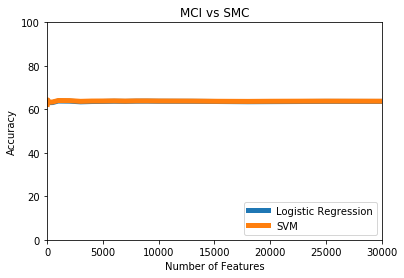

70
/Users/posnerlab/Dropbox (NYSPI)/00 AD ML/0papers/idp_jiook/Combine/Fig/AD vs MCI.pdf


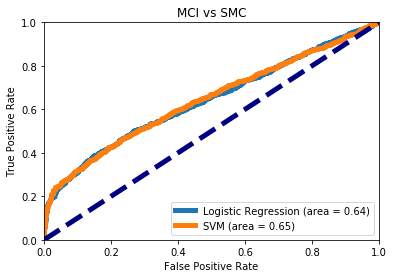

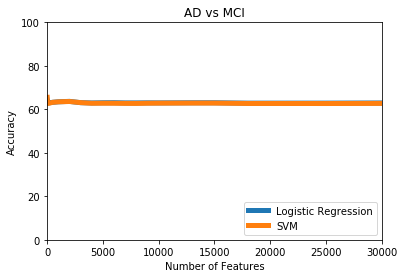

10


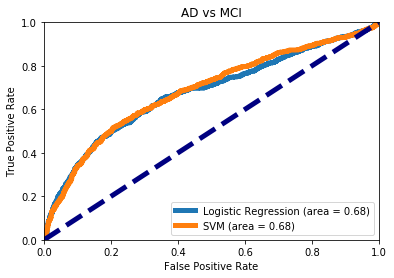

In [38]:
import os
cwd=os.getcwd()
os.chdir('/Users/posnerlab/Dropbox (NYSPI)/00 AD ML/Deep Learning Project')
path_to_save="/Users/posnerlab/Dropbox (NYSPI)/00 AD ML/0papers/idp_jiook/Combine/Fig/"

os.path.isdir(path_to_save)
if os.path.isdir(path_to_save):
    print("ok")
else:
    print("no this directory")
    os.mkdir(path_to_save)
    
#n_features = [1000,2000]

n_features = [10,30,50,70,80,100,1000,2000,13000,18000,10000,20000,3000,30000,4000,500,5000,6000,7000,8000,9000,15000,25000]
#n_features = [100,500,1000,2000,5000]


save_name=["AD vs SMC","MCI vs SMC","AD vs MCI"]
X_adsmi_new,y_adsmi,X_mcismi_new,y_mcismi,X_admci_new,y_admci=data_fetch_clean()
X=[X_adsmi_new,X_mcismi_new,X_admci_new]
y=[y_adsmi,y_mcismi,y_admci]
for i in range(2,4):


    #/ 6:AD-normal / 7:AD-MCI / 8:MCI-normal 
    name=save_name[i-1]
    svm_para=svc_param_selection(X[i-1],y[i-1],10)
    lr_para=lr_param_selection(X[i-1],y[i-1],10)
    
    # this is the main function 
    lrcc,svmcc,importances,lracc,svmacc=main(X[i-1],y[i-1],svm_para,lr_para,10,10,name,n_features,path_to_save) # 10 fold, repeat number, and the name to save; 
    accuracy_roc_save(X[i-1],y[i-1],lrcc,svmcc,name,10,10,importances,path_to_save)

4000


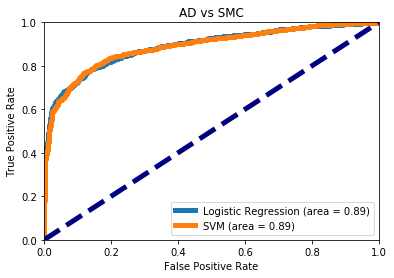

In [37]:
    accuracy_roc_save(X[i-1],y[i-1],lrcc,svmcc,name,10,10,importances,path_to_save)